# 勾配降下法 (Gradient descent)

## 数値微分（微分の数値的近似, 1変数の場合）

In [1]:
def numerical_differentiation(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2-h)

In [2]:
def f(x):
    return x ** 2 + 3 * x + 1

In [3]:
f(0.5)

2.75

## 偏微分の数値的近似, 複数変数の場合

In [4]:
import numpy as np
def numerical_partial_differential(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx_i in range(len(x)):
            tmp_val = x[idx_i]

            # f(x+h)
            x[idx_i] = tmp_val + h
            fxh1 = f(x)

            # f(x-h)
            x[idx_i] = tmp_val - h
            fxh2 = f(x)

            grad[idx_i] = (fxh1 - fxh2) / (2 * h)
            x[idx_i] = tmp_val
    return grad

In [5]:
import math
def f(x):
    return (x[0] + math.pi)**2 + (3 * x[1] - math.sqrt(2))**2

In [6]:
x = np.array([0.0, 0.0])
numerical_partial_differential(f, x)

array([ 6.28318531, -8.48528137])

# 勾配降下法

In [7]:
def gradient_decent(f, init_x, lr=0.1, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_partial_differential(f, x)
        x -= lr * grad
    return x

In [8]:
init_x = np.array([5.0, 5.0])
gradient_decent(f, init_x)

array([-3.14159265,  0.47140452])

### どのように最適化が進んだか履歴を追ってみましょう。

In [9]:
import copy
def gradient_decent(f, init_x, lr=0.1, step_num=100):
    x = init_x
    history = []
    for i in range(step_num):
        history.append(copy.deepcopy(x))
        grad = numerical_partial_differential(f, x)
        x -= lr * grad
    return x, np.array(history)

In [10]:
init_x = np.array([5.0, 5.0])
result_x, history = gradient_decent(f, init_x)

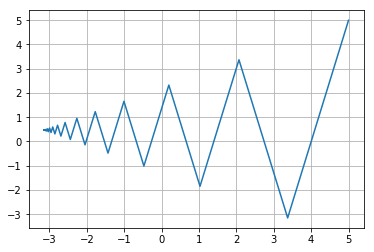

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
plt.plot(history[:, 0], history[:, 1])
plt.grid()
plt.show()